In [9]:
# Import main packages
from tilepy.include.ObservationScheduler import GetSchedule
from tilepy.include.PointingTools import NextWindowTools, getdate
from tilepy.include.CampaignDefinition import ObservationParameters
import time
import argparse
import os
from pathlib import Path

In [10]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

### Set of inputs needed to run the code

In [11]:
# The url to the FITS file with the sky localization, e.g.for GW https://urlpath/Bayestar.fits.gz'

# BBH with 2D localization
skymap = (
    "https://gracedb.ligo.org/api/superevents/S250328ae/files/Bilby.multiorder.fits,0"
)
obsTime = getdate("2025-03-28 19:10:00")
pointingsFile = None

# Path to the input datasets (where galaxy cat should be for GW case)
datasetDir = "../../src/tilepy/dataset/"

# Path to the output folder
outDir = "./output"

# Config file for the tiling scheduling
cfgFile = "../config/FollowupParameters_LST.ini"

# GalCat Name
galcatName = None

In [13]:
# Parse the parameters
obspar = ObservationParameters()
obspar.add_parsed_args(skymap, obsTime, datasetDir, galcatName, outDir, pointingsFile)
obspar.from_configfile(cfgFile)

In [14]:
print(obspar)

============== Observation Parameters ======================
Observatory Name: LST
Event Name: None
obsTime: 2025-03-28 19:10:00
---------------------- Strategy ----------------------
Algorithm = 3D, Strategy = integrated,  Mangrove = False
Do Plot = True, Do Rank = True, Count Previous= True, Second Round= False, Use Grey Time= False
--------------------- Observatory ---------------------
Observatory Location: 28.761944 deg, -17.89 deg, 2200.0 m
Wobble Offset: 0.0 deg
FOV: 2.5, Duration: 20.0, Min Duration: 10.0, Min Slewing: 0.0
Max Runs: 4, Max Nights: 1
Visibility: -18, -0.5, 65, 0, 0.0
Min Moon Source Separation: 30
Max Moon Source Separation: 145
Max Zenith: 70, Zenith Weighting: 0.75
FoV number of sides: 0, FoV rotation: 0,Priority for FoV proximity and Probability: 0.0, Zenith Weighting: 0.0
--------------------- Skymap considerations ----------------
Skymap: https://gracedb.ligo.org/api/superevents/S250328ae/files/Bilby.multiorder.fits,0
Cuts: MinProbcut 0.02, Dist Cut: 500.0,

### Run the scheduling

The filename is Bilby.multiorder.fits,0
The file exists, it will be re-downloaded


Starting the 2D pointing calculation with the following parameters

Filename:  S250328ae
Date:  2025-03-28 19:10:00
Previous pointings:  None
Dataset:  ../../src/tilepy/dataset/
Output:  ./output/S250328ae
90% area = 14.176194226144867. 50% area = 3.4850357221073063

============== Observation Parameters ======================
Observatory Name: LST
Event Name: S250328ae
obsTime: 2025-03-28 19:10:00
---------------------- Strategy ----------------------
Algorithm = 3D, Strategy = integrated,  Mangrove = False
Do Plot = True, Do Rank = True, Count Previous= True, Second Round= False, Use Grey Time= False
--------------------- Observatory ---------------------
Observatory Location: 28.761944 deg, -17.89 deg, 2200.0 m
Wobble Offset: 0.0 deg
FOV: 2.5, Duration: 20.0, Min Duration: 10.0, Min Slewing: 0.0
Max Runs: 4, Max Nights: 1
Visibility: -18, -0.5, 65, 0, 0.0
Min Moon Source Separation: 30
Max Moon Source Separation: 145
Max Zenith: 70, Zenith Weighting: 0.75
FoV number of sides: 0, FoV

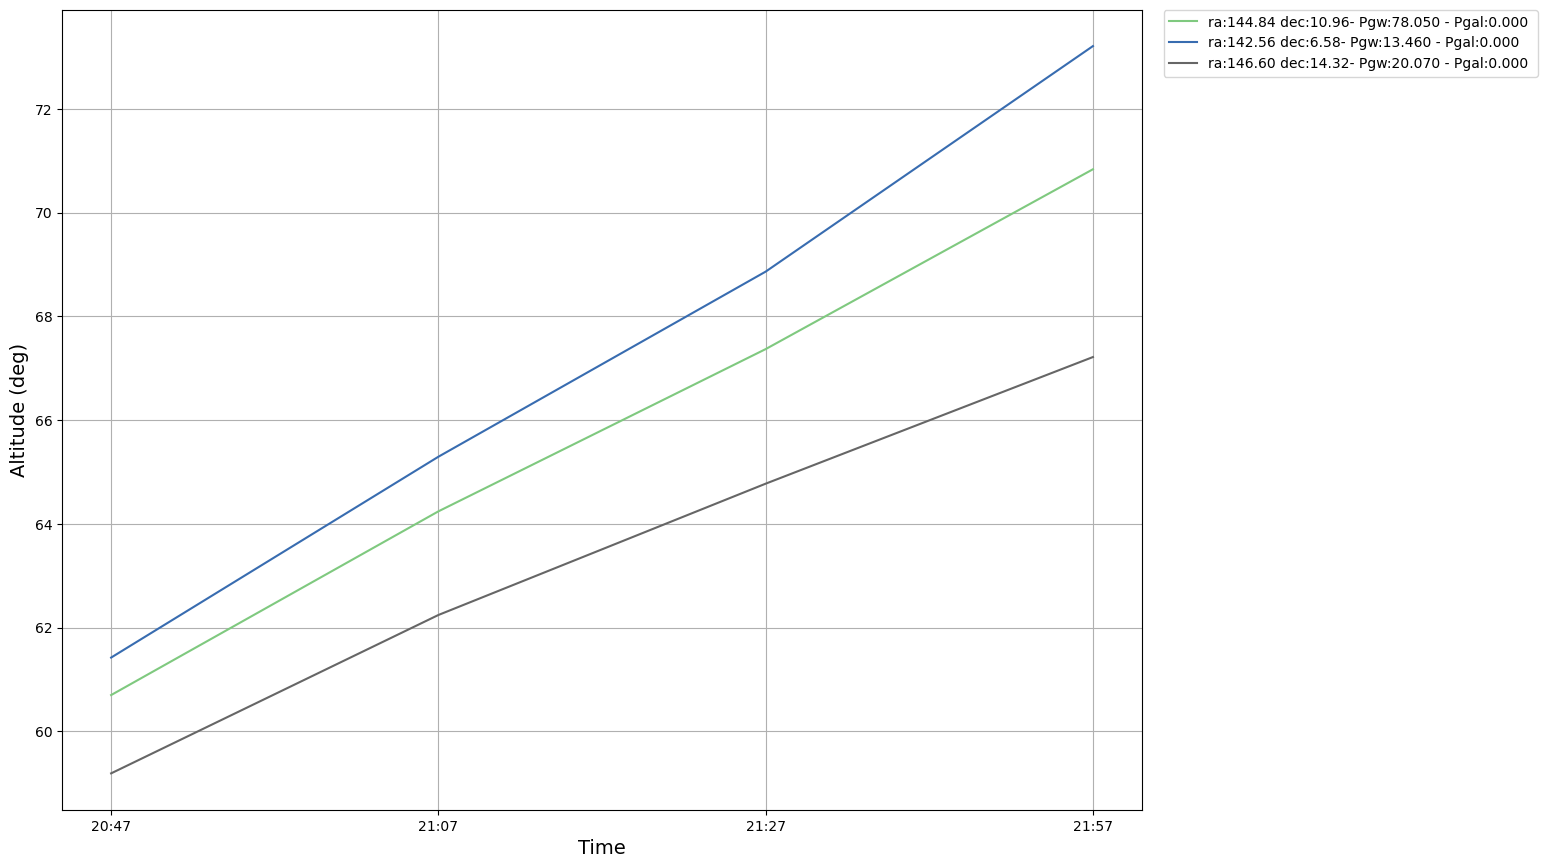

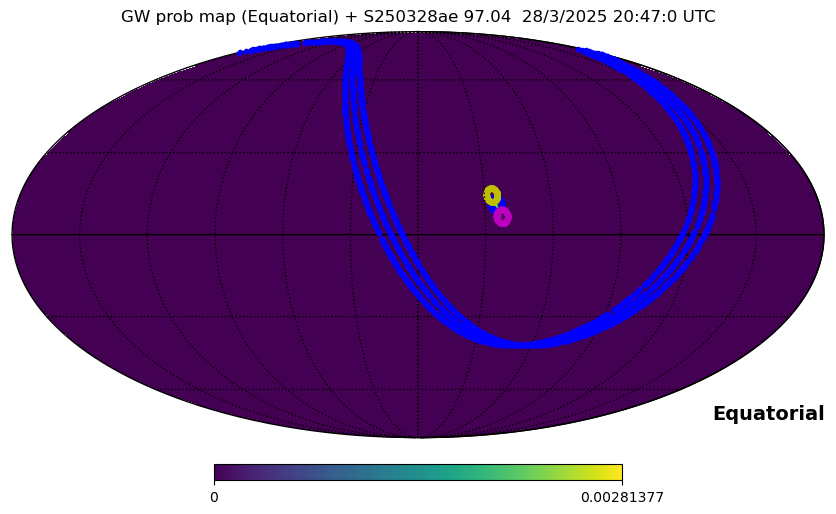

In [15]:
# Run the scheduler
GetSchedule(obspar)